In [53]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import MolsToGridImage


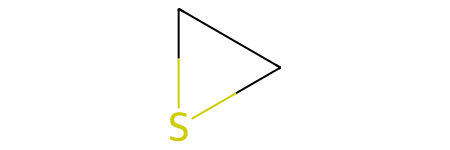

In [54]:
cycle_smiles = "C1CS1"
dp0 = Chem.MolFromSmiles(cycle_smiles)
dp0

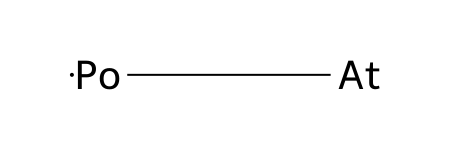

In [55]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (cyclic)

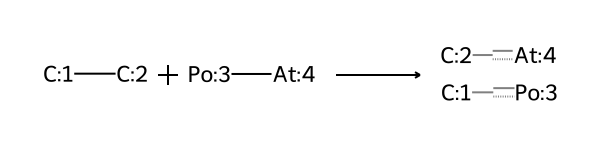

In [56]:
initiation = rdChemReactions.ReactionFromSmarts(
        "([CH2:1]-[CH2:2]).[Po:3]-[At:4]>>([CH2:1][Po:3].[CH2:2][At:4])"
    )
initiation

Num products: 2


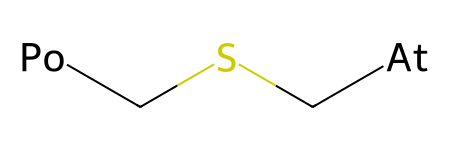

In [57]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((dp0, helper))[0][0]
print("Num products:", len(initiation.RunReactants((dp0, helper))))
dp1

### Propagation reaction (should work for everything)

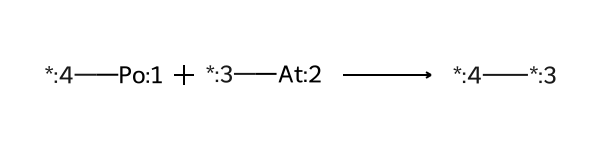

In [58]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

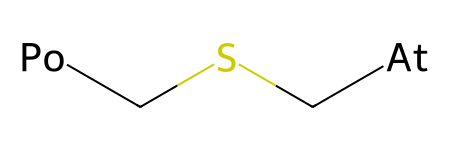

In [59]:
dp1

In [60]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
assert(len(products) == 1)
products

[10:20:06] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


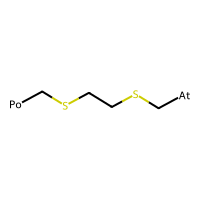

In [61]:
MolsToGridImage(products, molsPerRow=1)

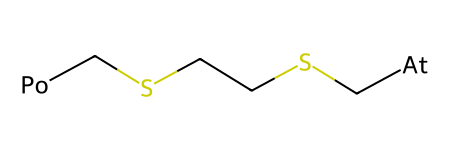

In [62]:
dp2 = products[0]
dp2

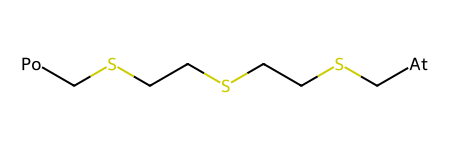

In [63]:
products = [item[0] for item in prop.RunReactants((dp1, dp2))]
assert(len(products) == 1)
dp3 = products[0]
dp3

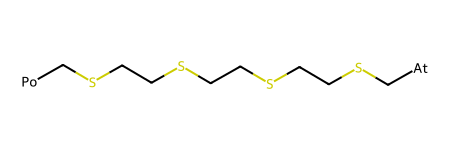

In [64]:
products = [item[0] for item in prop.RunReactants((dp1, dp3))]
assert(len(products) == 1)
dp4 = products[0]
dp4

### Replace end groups with CH3s

In [65]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [66]:
replaceAt.RunReactantInPlace(dp4)

True

In [67]:
replacePo.RunReactantInPlace(dp4)

True

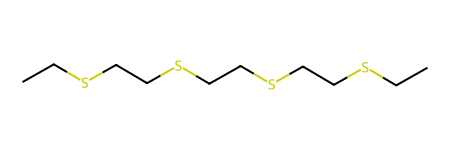

In [68]:
dp4